In [256]:
import numpy as np
import pandas as pd
from tslearn.utils import to_time_series, to_time_series_dataset
from tslearn.neighbors import KNeighborsTimeSeries

In [269]:
nN = 3
init = 100
test_points = 10
out_dim = 2

data = [np.random.rand(10,21) for _ in range(init)]
labels = np.array([list((np.random.randn(1,out_dim)+2)[0]) for _ in range(init)])

Transforming data to tslearn format

In [270]:
time_series = to_time_series_dataset(data)
time_series.shape

(100, 10, 21)

Unknown points

In [271]:
# test = data[0] # same as first known point

test = [np.random.rand(10,21) for _ in range(test_points)]
labels_test = np.array([list((np.random.randn(1,out_dim)+4)[0]) for _ in range(test_points)])

test_time_series = to_time_series_dataset(test)

print(test_time_series.shape)
# print(pred)

(10, 10, 21)


In [272]:
knn = KNeighborsTimeSeries(n_neighbors=nN).fit(time_series)

In [273]:
def knnUncertainty(nN,pred, test_time_series,labels,knn):

    pred = labels
    sigma = []
    distances, indices = knn.kneighbors(test_time_series,nN, return_distance=True)
    
    for i in range(len(test_time_series)):
        # print(i)
        dist = distances[i]
        print(dist)
        ind = (indices[i])
        print(ind)
        #calculate the nearest point error
        pred_near = pred[i]
        # print(pred_near)
        # print(ind)

        abs_err = np.abs(pred_near - labels[ind])
        print(abs_err)
        weights = 1 - (dist / dist.sum())
        print(weights)
        print(weights.shape)
        weights = np.broadcast_to(weights.reshape(len(ind), 1), (len(ind), out_dim))
        print(weights)
        weighted_err = np.mean(np.average(abs_err, weights=weights**nN) )

        nbrs_y = list(labels[ind])
        nbrs_y.append(pred[i])
        nbrs_var = np.std(nbrs_y)

        min_dist = np.min(dist)
        pred_var = weighted_err + min_dist * nbrs_var
        sigma.append(pred_var)
    sigma = np.array(sigma)
    return sigma

In [274]:
knnUncertainty(nN, labels_test, test_time_series,labels,knn)

[5.2643433  5.41558662 5.54684449]
[46 34 42]
[[0.64592201 1.05109316]
 [1.43836852 0.81812986]
 [0.86905284 0.14826472]]
[0.67557672 0.66625612 0.65816715]
(3,)
[[0.67557672 0.67557672]
 [0.66625612 0.66625612]
 [0.65816715 0.65816715]]
[5.44560712 5.56663624 5.59348647]
[58 11 29]
[[3.07817542 1.93968735]
 [0.63568681 1.59110127]
 [0.04326981 2.54575376]]
[0.67206457 0.66477618 0.66315925]
(3,)
[[0.67206457 0.67206457]
 [0.66477618 0.66477618]
 [0.66315925 0.66315925]]
[5.02317208 5.33090485 5.35243949]
[48 34 49]
[[3.11419217 0.72120271]
 [1.30429846 0.51836893]
 [0.48447942 0.64837089]]
[0.68018548 0.66059279 0.65922173]
(3,)
[[0.68018548 0.68018548]
 [0.66059279 0.66059279]
 [0.65922173 0.65922173]]
[5.48248623 5.61529483 5.6346348 ]
[45 48 51]
[[0.64189294 0.35909883]
 [2.72662592 1.06899011]
 [0.83701687 0.65930276]]
[0.67234342 0.66440621 0.66325037]
(3,)
[[0.67234342 0.67234342]
 [0.66440621 0.66440621]
 [0.66325037 0.66325037]]
[5.23867517 5.35932812 5.36932838]
[65 70 86]
[[

array([3.84825754, 7.70857041, 5.77587514, 6.38531108, 3.09688956,
       6.09853551, 5.07023043, 7.57313867, 4.59558623, 5.58583906])

In [ ]:
array([4.1884983 , 1.53541475, 1.5085826 , 2.83379748, 2.94832207,
       1.98689609, 1.92418307, 2.25995833, 2.40071495, 2.42274423])

In [234]:
a = np.array([[0,         0],
 [0.05709389, 0.24707099],
 [0.48952425, 0.23022069]])

In [134]:
a

array([[0.        , 0.        ],
       [0.05709389, 0.24707099],
       [0.48952425, 0.23022069]])

In [137]:
weights = np.array([1, 0.51519018, 0.48480982])
weights

array([1.        , 0.51519018, 0.48480982])

In [215]:
weights.transpose().shape

(3,)

In [213]:
weights.shape

(3,)

In [208]:
weights2 = np.concatenate([[weights, weights]]).transpose()
weights2

array([[1.        , 1.        ],
       [0.51519018, 0.51519018],
       [0.48480982, 0.48480982]])

In [210]:
weights

array([1.        , 0.51519018, 0.48480982])

In [221]:
weights.reshape(3,1)

array([[1.        ],
       [0.51519018],
       [0.48480982]])

In [237]:
weights2 = np.broadcast_to(weights.reshape(3,1), (3,2))

In [136]:
np.mean(np.average(a, axis=0, weights=weights))

0.1264105435210473

In [238]:
np.average(a, weights=weights2)

0.12641054352104727

# Other

In [1]:
from data import load_data
import numpy as np

In [2]:
A,_,vld, train, train_idx, vld_idx = load_data()

In [3]:
train_idx.shape

(80,)

In [4]:
train_idx

array([ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61,
       62, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81,
       83, 85, 88, 89, 90, 93, 94, 95, 96, 97, 98, 99])

In [5]:
vld_idx.shape

(20,)

In [6]:
vld_idx

array([ 1,  2, 14, 20, 21, 23, 29, 37, 51, 52, 60, 63, 71, 74, 82, 84, 86,
       87, 91, 92])

In [7]:
A.shape

(20631, 26)

In [8]:
vld.shape

(1838, 26)

In [9]:
train.shape

(16340, 26)

In [10]:
train.shape[0] + vld.shape[0] == A.shape[0]

False

In [4]:
np.array([X[X.unit_number==i].time.max() for i in X.unit_number.unique()]).min()

31

# Other 2

In [19]:
from preprocessing import build_data
from sklearn.preprocessing import MinMaxScaler
from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold




In [20]:
 net_cfg={'max_time': 100, 'lr': 0.01, 'num_rec': 3, 'neuron_0': 100, 'activation_0': 'tanh', 'dropout_0': 0.25, 'recurrent_dropout_0': 0.25, 
    'neuron_1': 50, 'activation_1': 'tanh', 'dropout_1': 0.25, 'recurrent_dropout_1': 0.25, 
    'neuron_2': 20, 'activation_2': 'tanh', 'dropout_2': 0.25, 'recurrent_dropout_2': 0.25, 
    'final_activation_0': 'exp', 'final_activation_1': 'softplus', 'percentage': 70, 'rul': 115, 'rul_style': 'nonlinear'}

cfg = {'cv': 10, 'shuffle': True,
        'random_state': 21,
        'mask_value': -99,
        'reps': 30,
        'epochs': 20,
        'batches': 64}
    

In [21]:
train_x_orig, feature_cols, vld_x_orig = load_data()

In [22]:
# Pre-processing data
scaler = pipeline.Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(-1, 1))),
    ('remove_constant', VarianceThreshold())])

In [23]:
train = train_x_orig.copy()
train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

vld = vld_x_orig.copy()
vld = np.concatenate([vld[['unit_number', 'time']], scaler.transform(vld[feature_cols])], axis=1)

In [24]:
train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

100%|██████████| 80/80 [00:01<00:00, 70.99it/s]


In [25]:
test_x, test_y = build_data(units=vld[:, 0], time=vld[:, 1], x=vld[:, 2:], max_time=net_cfg['max_time'],
                                is_test=True, mask_value=cfg['mask_value'],
                                original_data=vld_x_orig, net_cfg = net_cfg, label=net_cfg['rul_style'])


100%|██████████| 20/20 [00:00<00:00, 828.77it/s]


# Checking results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv('./results_no_cv_HO')

In [4]:
results

,fold,rmse_train,mae_train,r2_train,std_train,rmse_test,mae_test,r2_test,std_test,net_cfg
0,NaN,42.202866,36.435107,-27.466119,14.118401,43.845651,38.126250,-53.790583,14.277045,"{""num_rec"": 2, ""max_time"": 15, ""neuron_0"": 56,..."
1,NaN,72.417777,57.954437,-344.628218,12.621413,66.253240,51.226734,-284.823586,12.796667,"{""num_rec"": 3, ""max_time"": 22, ""neuron_0"": 56,..."
2,NaN,38.192010,26.351371,-6.681403,13.402648,23.475921,14.239514,-14.031767,11.297789,"{""num_rec"": 3, ""max_time"": 21, ""neuron_0"": 63,..."
3,NaN,36.173817,23.635571,-303.231498,3.379708,14.918328,10.848296,-197.455496,3.139416,"{""num_rec"": 3, ""max_time"": 26, ""neuron_0"": 81,..."
4,NaN,35.844815,27.606012,-19.304364,5.900217,18.770762,16.478312,-6.391346,6.598509,"{""num_rec"": 3, ""max_time"": 33, ""neuron_0"": 74,..."
5,NaN,37.642555,25.848663,-13.519016,7.560143,20.359301,13.870752,-31.868837,6.248027,"{""num_rec"": 3, ""max_time"": 36, ""neuron_0"": 69,..."
6,NaN,55.147214,46.550768,-1.240077,7.645345,54.716844,46.055594,-23.218774,6.125483,"{""num_rec"": 2, ""max_time"": 26, ""neuron_0"": 88,..."
7,NaN,21.930715,14.549721,-0.339728,11.969555,12.642588,7.638561,-2.650647,12.472796,"{""num_rec"": 2, ""max_time"": 21, ""neuron_0"": 62,..."
8,NaN,2114.228369,156.152675,-0.000217,100.208021,56.462788,53.757092,-5872.060861,2.085399,"{""num_rec"": 3, ""max_time"": 23, ""neuron_0"": 77,..."
9,NaN,23.455651,19.686773,0.081637,4.773383,23.222712,20.095152,-5.096465,4.186386,"{""num_rec"": 3, ""max_time"": 14, ""neuron_0"": 68,..."


<AxesSubplot:xlabel='rmse_test', ylabel='std_test'>

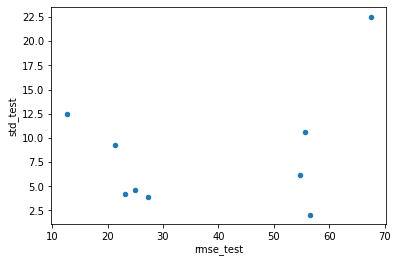

In [13]:
results.iloc[6:].plot.scatter(x='rmse_test', y='std_test')

In [1]:
from subprocess import STDOUT, check_output
import testing, subprocess
import re

Time
Marios
(1, 2, True)


In [2]:
a = testing.func()

Marios


In [3]:
a

(1, 2, True)

In [4]:
cmd = ['python3', 'testing.py']

In [5]:
outs = " "

In [19]:
outs = str(check_output(cmd,stderr=STDOUT, timeout=40000, encoding="utf8"))

In [20]:
outs

'Time\nMarios\n(1, 2, True)\n'

In [17]:
outs = outs.split('\n')

In [18]:
outs

['Time', 'Marios', '(1, 2, True)', '']

In [13]:
a = outs[-2]

In [14]:
a

'(1, 2, True)'

In [15]:
eval(a)

(1, 2, True)

In [32]:
[-1 * float(a[0]), -1 * float(a[1]), bool(a[2])]

ValueError: could not convert string to float: '('

In [28]:
outs = outs.split('\n')

AttributeError: 'list' object has no attribute 'split'

In [24]:
for i in range(len(outs)):
                if re.match(r'\(.*?,.*?\)', outs[i]) is not None:
                    print(outs[i])

(1, 2, True)


In [13]:
outs[0]
tuple(float(s) for s in outs[0].strip("()").split(","))

ValueError: could not convert string to float: ' True'

In [8]:
outs = outs.split("\n")

In [9]:
float(outs[0])

ValueError: could not convert string to float: '(1, 2, 3)'

In [20]:
print(subprocess.check_output(["echo", "abc"]).decode("UTF-8"))


abc



In [21]:
print(float(outs[0]))

ValueError: could not convert string to float: "b'3"